In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()


-0.294118  0.487437  0.180328  -0.292929         0  0.00149028  -0.53117  \
0  -0.882353 -0.145729  0.081967  -0.414141  0.000000   -0.207153 -0.766866   
1  -0.058824  0.839196  0.049180   0.000000  0.000000   -0.305514 -0.492741   
2  -0.882353 -0.105528  0.081967  -0.535354 -0.777778   -0.162444 -0.923997   
3   0.000000  0.376884 -0.344262  -0.292929 -0.602837    0.284650  0.887276   
4  -0.411765  0.165829  0.213115   0.000000  0.000000   -0.236960 -0.894962   

   -0.0333333  0.1  
0   -0.666667    1  
1   -0.633333    0  
2    0.000000    1  
3   -0.600000    0  
4   -0.700000    1

In [ ]:
#Description about the dataset
df.describe()

-0.294118    0.487437    0.180328   -0.292929           0  0.00149028  \
count  758.000000  758.000000  758.000000  758.000000  758.000000  758.000000   
mean    -0.407807    0.218208    0.176500   -0.289731   -0.323961   -0.032289   
std      0.386493    0.306465    0.201420    0.258651    0.375608    0.205508   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.179583   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         -0.53117  -0.0333333         0.1  
count  758.000000  758.000000  758.000000  
mean    -0.663427   -0.516799    0.654354  
std      0.283202    0.400674    0.475893  
min     -0.994876   -0.966667    0.000000  
25%     -0.858241   -0.866667    0.000000  
50%     -0.748506   -0.633333    1.000000  
75%     -0.532451   -0.233333    1.000000  
max      1.000000    1.000000    1.000000

In [ ]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   -0.294118   758 non-null    float64
 1   0.487437    758 non-null    float64
 2   0.180328    758 non-null    float64
 3   -0.292929   758 non-null    float64
 4   0           758 non-null    float64
 5   0.00149028  758 non-null    float64
 6   -0.53117    758 non-null    float64
 7   -0.0333333  758 non-null    float64
 8   0.1         758 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 53.4 KB


In [ ]:
#Checking for missing values in the dataset
df.isnull().sum()

-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
0             0
0.00149028    0
-0.53117      0
-0.0333333    0
0.1           0
dtype: int64

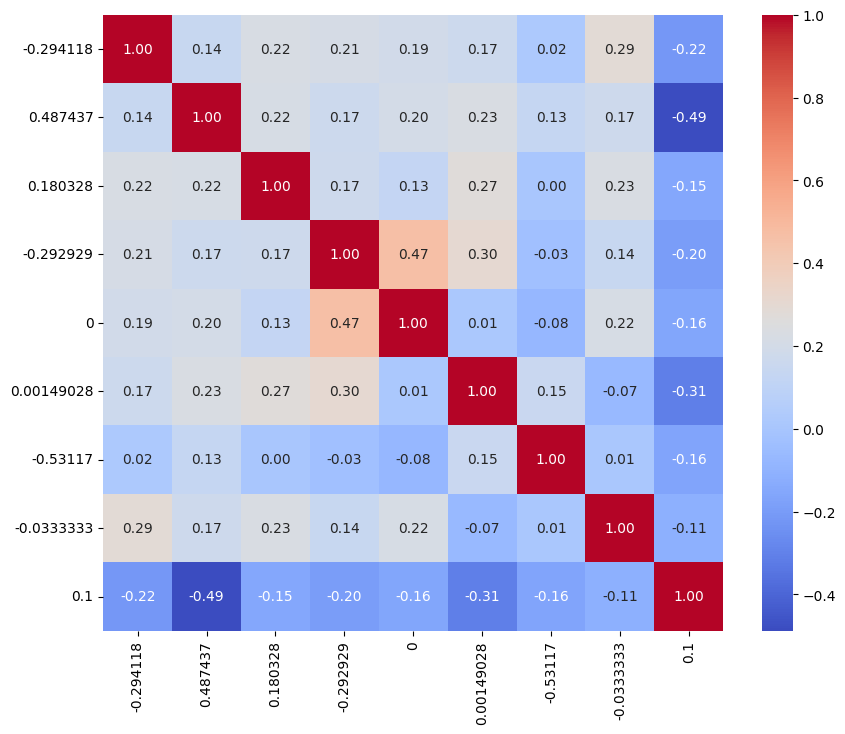

In [ ]:
#Check for correlation between the variables
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


Checked the correlation matrix to check for redundancy between the features

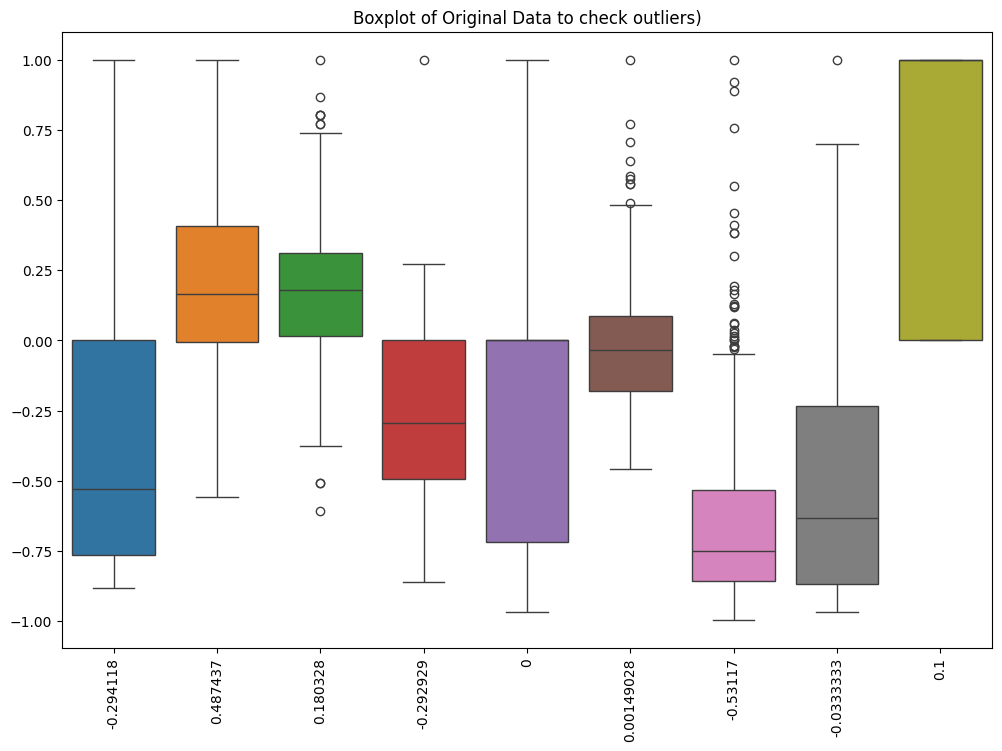

In [ ]:
#Outlier detection
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots before filtering
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Original Data to check outliers)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Considering the last column as the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [ ]:
#Splitting the dataset into 80-20 rule
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#Base model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build a simple base model
base_model = Sequential()
base_model.add(Dense(16, input_dim=xtrain.shape[1], activation='relu'))
base_model.add(Dense(8, activation='relu'))
base_model.add(Dense(1, activation='sigmoid'))

# Compile the model
base_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the base model
history_1 = base_model.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_data=(xtest, ytest))

# Evaluate the model
base_loss, base_accuracy = base_model.evaluate(xtest, ytest)
print(f"Base model accuracy for the dataset: {base_accuracy * 100:.2f}%")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3263 - loss: 0.7343 - val_accuracy: 0.3553 - val_loss: 0.7137
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3793 - loss: 0.7052 - val_accuracy: 0.4474 - val_loss: 0.6962
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5249 - loss: 0.6908 - val_accuracy: 0.6250 - val_loss: 0.6796
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6606 - loss: 0.6728 - val_accuracy: 0.6316 - val_loss: 0.6645
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6994 - loss: 0.6552 - val_accuracy: 0.6711 - val_loss: 0.6482
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7045 - loss: 0.6380 - val_accuracy: 0.6711 - val_loss: 0.6320
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7001 - loss: 0.6242 - val_accuracy: 0.6908 - val_loss: 0.6160
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6859 - loss: 0.6128 - val_accuracy: 0.6645 - val_loss: 0.599

The base model with simple architecture represents the use of 3 layers(Input layer, hidden layer and the output layer), 25 neurons, ReLu(hidden layer) and Sigmoid(binary) activation functions.

Layers = 3 Epoch = 50 Neurons = 25 Activation = Relu & Sigmoid Optimizer = Adam

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict probabilities & convert to class labels (Threshold = 0.5)
y_pred_prob = base_model.predict(xtest)
ypred = (y_pred_prob > 0.5).astype(int)

# Compute classification metrics
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

# Display results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(ytest, ypred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Precision: 0.84
Recall: 0.89
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        52
           1       0.84      0.89      0.86       100

    accuracy                           0.82       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.82      0.81       152



In [ ]:
# Build a hyperparameter-tuned model
tuned_model = Sequential()
tuned_model.add(Dense(64, input_dim=xtrain.shape[1], activation='relu'))  # More neurons
tuned_model.add(Dense(32, activation='relu'))  # Additional layer
tuned_model.add(Dense(16, activation='relu'))  # Additional layer
tuned_model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model with a different optimizer and learning rate
tuned_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the tuned model
history_2 = tuned_model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_data=(xtest, ytest))

# Evaluate the model
tuned_loss, tuned_accuracy = tuned_model.evaluate(xtest, ytest)
print(f"Tuned model accuracy for the dataset: {tuned_accuracy * 100:.2f}%")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6022 - loss: 0.6807 - val_accuracy: 0.6579 - val_loss: 0.6727
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6226 - loss: 0.6715 - val_accuracy: 0.6711 - val_loss: 0.6658
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6485 - loss: 0.6627 - val_accuracy: 0.6645 - val_loss: 0.6594
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6532 - loss: 0.6575 - val_accuracy: 0.6579 - val_loss: 0.6535
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6320 - loss: 0.6536 - val_accuracy: 0.6711 - val_loss: 0.6480
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6463 - loss: 0.6506 - val_accuracy: 0.6645 - val_loss: 0.6427
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6644 - loss: 0.6388 - val_accuracy: 0.6645 - val_loss: 0.6378
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6730 - loss: 0.6295 - val_accuracy: 0.6645 - val_loss: 0.

In this hyperparameter tuning, increased the number of layers from 3 to 4, increased epoch from 50 to 100, 113 neurons, the learning rate changed from 0.001 to 0.0001, and used Adam optimizer with Relu & Sigmoid activation functions.

Layers = 4, Neurons = 113, Epoch = 100, Learning Rate = 0.0001, Activation = Relu & Sigmoid, Optimizer = Adam.

These changes brought a slight improvement of 2% in accuracy and loss which could show huge impact on optimization.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict probabilities & convert to class labels (Threshold = 0.5)
y_pred_prob = base_model.predict(xtest)
ypred = (y_pred_prob > 0.5).astype(int)

# Compute classification metrics
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

# Display results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(ytest, ypred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Precision: 0.82
Recall: 0.89
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        52
           1       0.82      0.89      0.86       100

    accuracy                           0.80       152
   macro avg       0.79      0.76      0.77       152
weighted avg       0.80      0.80      0.80       152



The classification report here, shows the precision, recall and F1 score for hyperparameter tuning.

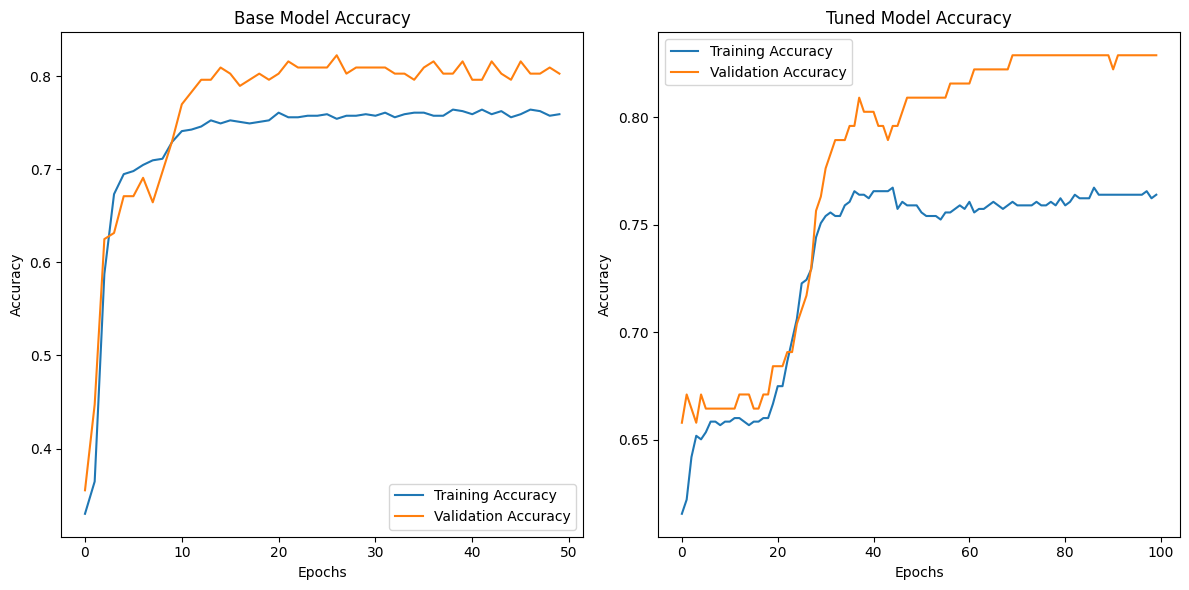

Base Model Accuracy: 80.26%
Tuned Model Accuracy: 82.89%


In [ ]:
import matplotlib.pyplot as plt

# Plot the training & validation accuracy for both models
plt.figure(figsize=(12, 6))

# Base model accuracy
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Base Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Tuned model accuracy
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Tuned Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Compare accuracy results
print(f"Base Model Accuracy for the dataset: {base_accuracy * 100:.2f}%")
print(f"Tuned Model Accuracy for the dataset: {tuned_accuracy * 100:.2f}%")


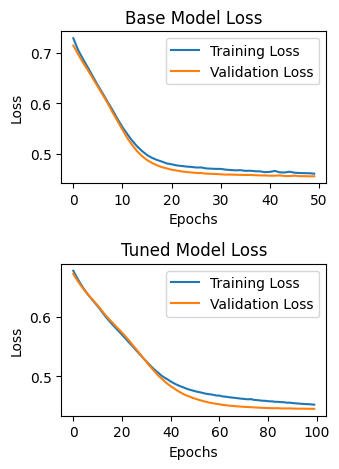

Base Model loss: 45.52%
Tuned Model loss: 44.56%


In [ ]:
# Base Model Loss
plt.subplot(2, 2, 2)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Base Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tuned Model Loss
plt.subplot(2, 2, 4)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Tuned Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Compare loss results
print(f"Base Model loss for the dataset: {base_loss * 100:.2f}%")
print(f"Tuned Model loss for the dataset: {tuned_loss * 100:.2f}%")

There is a loss decrease of 1% after hyperparameter tuning which led to convergence.

The base model, consisting of 3 layers (input, hidden, and output), 25 neurons, ReLU activation for the hidden layer, Sigmoid activation for binary classification, and the Adam optimizer, achieved an accuracy of 80.26%. After hyperparameter tuning, improvements were made by increasing the number of layers from 3 to 4, increasing neurons to 113, extending epochs from 50 to 100, adjusting the learning rate from 0.001 to 0.0001, and retaining the Adam optimizer with ReLU and Sigmoid activation functions. These changes resulted in a 2.63% improvement  bringing the accuracy to 82.89%. Such that, the accuracy increase may seem small, it can significantly impact optimization and overall model performance.

REFERENCES/CITATIONS:
1. Slides from class/ lectures from professors related to hyperparameter tuning.
2. Kaggle.
3. ChatGPT.
